In [1]:
#1.1
## Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#1.2
## Read in the data and inspect again
import pandas as pd
df = pd.read_csv("C:/Users/eymoo/Documents/US_Accidents_Dec20.csv")
df.head()
# California has 972K cases which is enough for analysis. We will grab only California data and will use it for the analysis. 
cal = df.loc[df['State'] == 'CA']

t_cal=cal.transpose()
t_cal.iloc[:, 0:2]

,728,729
ID,A-729,A-730
Source,MapQuest,MapQuest
TMC,201,201
Severity,3,3
Start_Time,2016-06-21 10:34:40,2016-06-21 10:30:16
End_Time,2016-06-21 11:04:40,2016-06-21 11:16:39
Start_Lat,38.0853,37.6318
Start_Lng,-122.233,-122.084
End_Lat,NaN,NaN
End_Lng,NaN,NaN


In [3]:
#1.3 Exploring data
## Check out its appearance. 
cal.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,523752.000000,972585.000000,972585.000000,972585.000000,448833.000000,448833.000000,972585.000000,2.286270e+05,946414.000000,487997.000000,944913.000000,952587.000000,950573.000000,832935.000000,468426.000000
mean,209.308524,2.255975,35.564095,-119.491106,35.560920,-119.435477,0.172793,9.076525e+03,64.126147,62.010251,59.373195,29.751488,9.092897,6.690909,0.005445
std,20.713522,0.469742,2.049160,1.946426,2.070667,1.927370,0.703288,2.360027e+04,12.957989,14.134176,23.755935,0.630954,2.428113,5.752246,0.045628
min,200.000000,1.000000,32.542587,-124.369232,32.542490,-124.283913,0.000000,1.000000e+00,-29.900000,-18.800000,1.000000,0.300000,0.000000,0.000000,0.000000
25%,201.000000,2.000000,33.967464,-121.594109,33.966988,-121.487224,0.000000,1.699000e+03,55.000000,53.000000,42.000000,29.770000,10.000000,3.500000,0.000000
50%,201.000000,2.000000,34.178920,-118.400819,34.183114,-118.391136,0.000000,5.021000e+03,63.000000,61.000000,62.000000,29.910000,10.000000,6.000000,0.000000
75%,201.000000,3.000000,37.699343,-117.924438,37.686680,-117.883860,0.032000,1.299900e+04,72.000000,71.000000,78.000000,30.020000,10.000000,9.200000,0.000000
max,406.000000,4.000000,42.005420,-114.229121,42.032113,-114.217500,227.210007,9.999997e+06,127.400000,127.000000,100.000000,58.040000,140.000000,822.800000,24.000000


In [4]:
#1.3
## overview of the data
cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972585 entries, 728 to 4232540
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     972585 non-null  object 
 1   Source                 972585 non-null  object 
 2   TMC                    523752 non-null  float64
 3   Severity               972585 non-null  int64  
 4   Start_Time             972585 non-null  object 
 5   End_Time               972585 non-null  object 
 6   Start_Lat              972585 non-null  float64
 7   Start_Lng              972585 non-null  float64
 8   End_Lat                448833 non-null  float64
 9   End_Lng                448833 non-null  float64
 10  Distance(mi)           972585 non-null  float64
 11  Description            972584 non-null  object 
 12  Number                 228627 non-null  float64
 13  Street                 972585 non-null  object 
 14  Side                   972585 non

In [5]:
#1.3
##We should also look more closely at the dimensions of the dataset. 
np.shape(cal)

(972585, 49)

array([[<AxesSubplot:title={'center':'Severity'}>]], dtype=object)

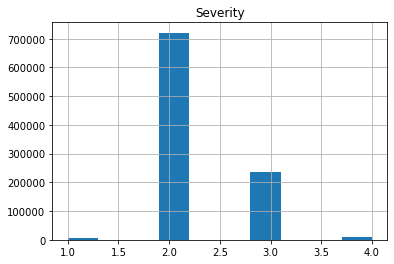

In [6]:
#1.4 Let's take a look at the distribution of severity of traffic accident
# Making a histogram of the quality variable.
cal.hist(column='Severity')

In [7]:
# Get a list of the values of the quality variable, and the number of occurrences of each. 
cal['Severity'].value_counts()


2    720878
3    237018
4      8876
1      5813
Name: Severity, dtype: int64

In [8]:
#2. Cleaning, Transforming, and Visualizing

In [9]:
#2.1 Pick the data of the interests

X= cal[["Temperature(F)","Humidity(%)","Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]]
Y=cal[["Severity"]]
data=cal[["Temperature(F)","Humidity(%)","Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)", "Severity"]]

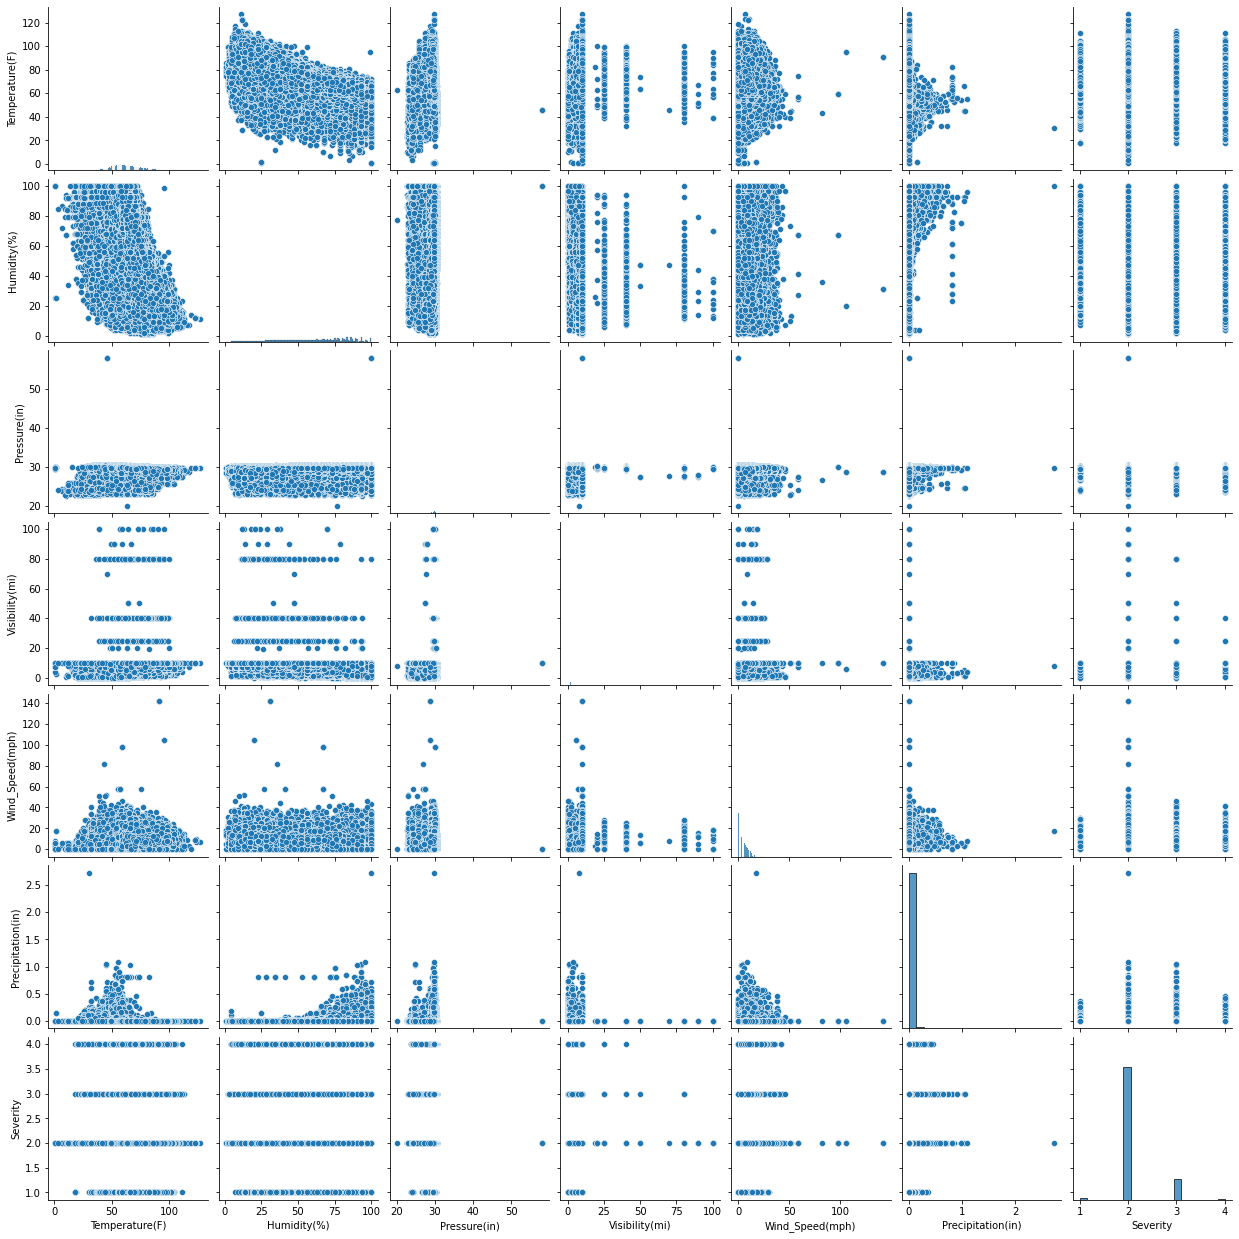

In [21]:
import seaborn
import matplotlib.pyplot as plt

# Drop NA from the records
data = data.dropna()
seaborn.pairplot(data2)
plt.show()

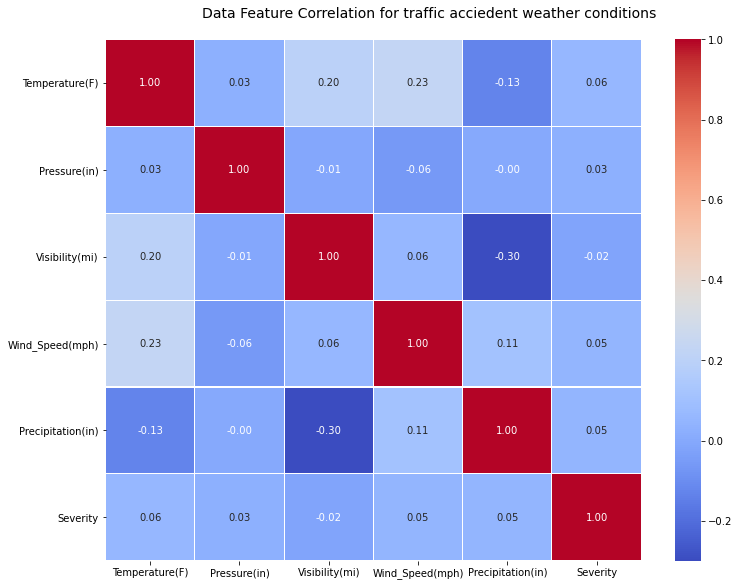

In [22]:
## Visualize Relationships between Variables

#Let's use a Correlation Matrix to look at the relationships between variables. 
#Create a correlation heatmap for looking at the correlation of all variables/features for all USA matches
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Data Feature Correlation for traffic acciedent weather conditions', fontsize=14)

In [23]:
# hmm... Not much correlated except Humidity vs Temperature. 
# Let's drop humidity

X= data[["Temperature(F)","Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]]
Y= data[["Severity"]]
data=data[["Temperature(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)", "Severity"]]

In [24]:
data.isna().sum()

Temperature(F)       0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Severity             0
dtype: int64

In [25]:
# Making a Linear Regression model


# Split the data using train_test_split()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [26]:
# Create the model
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train)

# Fit the model with fit() 
results = model.fit()
results.params, results.tvalues

(const                1.633171
 Temperature(F)       0.001951
 Pressure(in)         0.013448
 Visibility(mi)      -0.003676
 Wind_Speed(mph)      0.002923
 Precipitation(in)    0.606003
 dtype: float64,
 const                63.423887
 Temperature(F)       35.992188
 Pressure(in)         15.547895
 Visibility(mi)      -13.997219
 Wind_Speed(mph)      21.539353
 Precipitation(in)    24.063660
 dtype: float64)

In [27]:
# Evaluate the model with .summary()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Severity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     655.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:49:19   Log-Likelihood:            -1.6687e+05
No. Observations:              341271   AIC:                         3.338e+05
Df Residuals:                  341265   BIC:                         3.338e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.6332      0.02

In [ ]:
# It looks like severity = 1.6+ 0.6 * Precipitation + 0.0134 * Pressure - 0.0037 Visibility... and so on. Whether it's rainy day or not greratly impact the severity of the traffic accident.